NOTEBOOK TP2

# Extraction de Keywords

## Imports

In [1]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [2]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [3]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [4]:
# Imprimer le nombre de fichiers identifiés
len(files)

7937

## Créer un fichier contenant le texte de tous les journaux de l'année 1888

In [5]:
# Choisir une année
year = 1888

In [6]:
# Lister les fichiers de cette année
data_path = '../data/txt'
txt_path = '../data/txt/'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [7]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [8]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [10]:
# Lister les Fichiers
temp_path = '../data/tmp'
files = os.listdir(temp_path)

In [11]:
# Imprimer le nombre de fichiers identifiés
len(files)

4

In [12]:
# Les dix premiers fichiers 
files[:10]

['1888.png', '1888.txt', '1888_clean.txt', '1945.txt']

In [13]:
# Choisir le fichier de l'annéee choisie (1988)
this_file = files[1]
this_file

'1888.txt'

In [76]:
# Récupérer le texte du fichier de l'annéee choisie (1988)
text = open(os.path.join(temp_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"auteurs une. rare audace. Deux messieurs so disant inspecteurs do police se présentèrent chez elle, lui exhibant un mandat d’amener dé- 'esmô.pàï: le procureur de : la République 4 elle tt4^ f --accuséo -do détournement de valeurs %f|jj|^éaant à son-mari. • -Màigr’é;les protestations deW m ® B..-, ils lie voulurent rien entendre, ne. connaissant, disaient-ils, que leux* devoir ! Toutefois ils fini- rent-par consentir à aller demander au procu rêur de la République de la laisser en liberté bous C"

In [77]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('rue', 8.168075662723822e-06),
 ('louer belle maison', 1.5737125911030542e-05),
 ('Bruxelles', 2.0806293901501803e-05),
 ('rue Neuve BRUXELLES', 3.2093389306186036e-05),
 ('GRAND CONCOURS BRUXELLES', 3.5429149037520886e-05),
 ('Maison', 3.7176403508749395e-05),
 ('Agence Rossel', 4.434276767776142e-05),
 ('louer jolie maison', 5.100321259501685e-05),
 ('maison rue Van', 5.2198602351094246e-05),
 ('louer grande maison', 5.449688972369905e-05),
 ('maison rue', 5.730351907938821e-05),
 ('rue Royale', 5.7671888129334714e-05),
 ('rue Van', 7.422362227570289e-05),
 ('belle maison', 7.527359889806947e-05),
 ('louer maison', 7.765482567527484e-05),
 ('belle maison rue', 7.924901557956952e-05),
 ('place', 8.246717579759795e-05),
 ('louer', 9.529170974497328e-05),
 ('Grand concours', 0.00010134225171180778),
 ('faire', 0.00010463311084227079),
 ('rue Neuve', 0.00010613941193763225),
 ('louer rue', 0.00011162459257627249),
 ('heures', 0.00011232083797766238),
 ('grand', 0.00011508177010360376),

In [78]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Agence Rossel',
 'maison rue',
 'rue Royale',
 'rue Van',
 'belle maison',
 'louer maison',
 'Grand concours',
 'rue Neuve',
 'louer rue',
 'Bruxelles rue',
 'rue Madeleine',
 'demande place',
 'RENTIER rue',
 'S’ad. rue',
 'rue Haute',
 'COMMERCE rue']

# Nuages de mots

## Imports et stopwords

In [57]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "lequel", "leur","avec"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [59]:
# Choisir une année
year = 1888

In [60]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [62]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [63]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"auteurs une. rare audace. Deux messieurs so disant inspecteurs do police se présentèrent chez elle, lui exhibant un mandat d’amener dé- 'esmô.pàï: le procureur de : la République 4 elle tt4^ f --accus"

In [65]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [66]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"auteurs une. rare audace. Deux messieurs so disant inspecteurs do police se présentèrent chez elle, lui exhibant un mandat d’amener dé- 'esmô.pàï: le procureur de : la République 4 elle tt4^ f --accuséo -do détournement de valeurs %f|jj|^éaant à son-mari. • -Màigr’é;les protestations deW m ® B..-, ils lie voulurent rien entendre, ne. connaissant, disaient-ils, que leux* devoir ! Toutefois ils fini- rent-par consentir à aller demander au procu rêur de la République de la laisser en liberté bous C"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [67]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [68]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1888_clean.txt!'

In [70]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'AUTEURS RARE AUDACE MESSIEURS DISANT INSPECTEURS POLICE PRÉSENTÈRENT CHEZ EXHIBANT MANDAT AMENER ESMÔ PÀÏ PROCUREUR RÉPUBLIQUE ACCUSÉO DÉTOURNEMENT VALEURS ÉAANT MARI MÀIGR PROTESTATIONS DEW LIE VOULURENT RIEN ENTENDRE CONNAISSANT DISAIENT LEUX DEVOIR TOUTEFOIS FINI RENT CONSENTIR ALLER DEMANDER PROCU RÊUR RÉPUBLIQUE LAISSER LIBERTÉ BOUS CAUTION DEMI HEURE ABSENCE REVINRENT AUTORISATION LAISSER LIBERTÉ CAUTION VERSER IMMÉDIATEMENT ENTRO LEURS MAINS GETTÈ DERNIÈRE DÉFIANCE EMPRESSA EOMPTOR SOMME '

## Nuage de mots

### Afficher les termes les plus fréquents


In [71]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 2741), ('BRUXELLES', 947), ('MAISON', 931), ('PLACE', 760), ('LOUER', 729), ('ANS', 614), ('HEURES', 609), ('PRIX', 572), ('TRÈS', 507), ('GRAND', 498)]


### Créer, stocker et afficher le nuage de mots

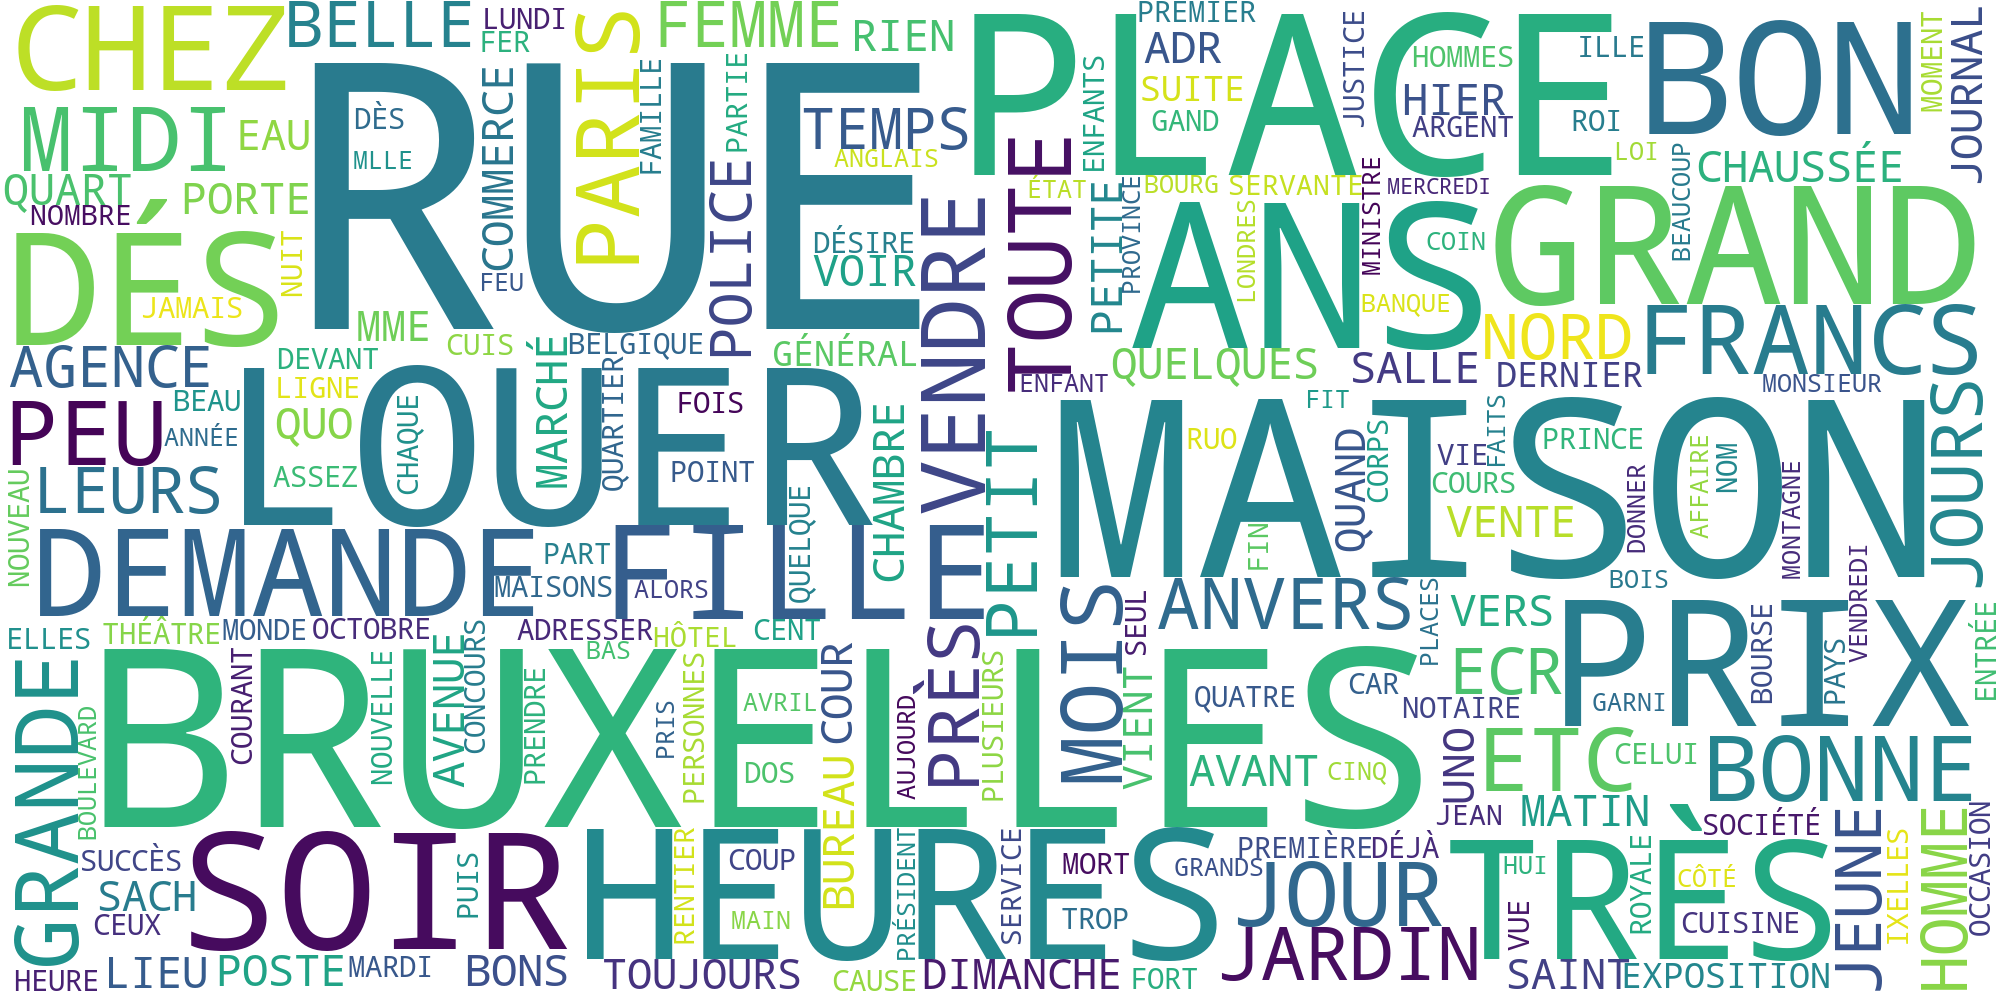

In [72]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [35]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [36]:
nlp = spacy.load('fr_core_news_md')

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [39]:
# Charger le texte
n=100000
text = open("../data/tmp/1888.txt", encoding='utf-8').read()[:n]

In [40]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 22.8 s
Wall time: 28.6 s


In [42]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1


# Compter les entités
organisations = defaultdict(int)
for ent in doc.ents:
    if ent.label_== "ORG" and len(ent.text) > 3:
        organisations[ent.text] += 1

# Compter les entités
locations = defaultdict(int)
for ent in doc.ents:
    if ent.label_== "LOC" and len(ent.text) > 3:
        locations[ent.text] += 1

In [43]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
sorted_organisations = sorted(organisations.items(), key=lambda kv: kv[1], reverse=True)
sorted_locations = sorted(locations.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")
    
    for organisation, freq in sorted_organisations[:50]:
        print(f"{organisation} apparait {freq} fois dans le corpus")
        
        for location, freq in sorted_locations[:50]:
            print(f"{location} apparait {freq} fois dans le corpus")
            

Henri apparait 7 fois dans le corpus
Agence Rossel apparait 3 fois dans le corpus
Bruxelles apparait 9 fois dans le corpus
Paris apparait 9 fois dans le corpus
Londres apparait 6 fois dans le corpus
Bourse apparait 5 fois dans le corpus
Liège apparait 4 fois dans le corpus
Flandre apparait 4 fois dans le corpus
Gand apparait 4 fois dans le corpus
France apparait 4 fois dans le corpus
Ixelles apparait 4 fois dans le corpus
Sablon apparait 3 fois dans le corpus
Anvers apparait 3 fois dans le corpus
Belgique apparait 3 fois dans le corpus
Russie apparait 3 fois dans le corpus
Flénu apparait 3 fois dans le corpus
Nord apparait 3 fois dans le corpus
Autriche apparait 2 fois dans le corpus
Vienne apparait 2 fois dans le corpus
Tonage Brux apparait 2 fois dans le corpus
La Haye apparait 2 fois dans le corpus
Mons apparait 2 fois dans le corpus
Durand apparait 2 fois dans le corpus
Anglais apparait 2 fois dans le corpus
rue de l'Empereur apparait 2 fois dans le corpus
Louvain apparait 2 fois d

# Sentiment analysis avec Textblob-FR

## Imports

In [45]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Fonction

In [82]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [47]:
get_sentiment("le rendement des céréales a été médiocre")

This text is 40% negative and 0.5% subjective.


In [48]:
get_sentiment("On a oublié la presse !")

This text is 50% negative and 0.3% subjective.


In [81]:
get_sentiment("les tableaux de M. Schlobach sont un beau début dans une nouvelle manière qui côtoie le ridicule et le très beau.") 

This text is 29% positive and 0.7% subjective.


In [50]:
get_sentiment("Deux messieurs so disant inspecteurs do police se présentèrent chez elle, lui exhibant un mandat d’amener.")

This text is neutral and perfectly objective.


In [83]:
get_sentiment("Il nous paraît que c’est aller un peu lestement en besogne.")

This text is 4% negative and 0.25% subjective.


In [52]:
get_sentiment("Ma femme ne veut pas mettre plus de cent francs")

This text is 18% positive and 0.15000000000000002% subjective.


In [53]:
get_sentiment("L’état du pauvre petit est très grave")

This text is 18% positive and 0.3% subjective.


In [54]:
get_sentiment("60,000 EXEMPLAIRES distribués gratuitement dans toute l’agglomération bruxelloise et en province.")

This text is 26% positive and 0.5% subjective.


In [55]:
get_sentiment("Napoléon I er a dit que celle-ci serait républicaine ou cosaque.")

This text is neutral and perfectly objective.


In [56]:
get_sentiment("Aussi faisons-nous amende honorable et - poùr dédommager le confrère du tort que nous avons peut- être’ pu lui faire")

This text is 50% positive and 0.7% subjective.
